In [2]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
import numpy as np
import os
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import datetime
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

## 数据处理

## 1.数据整理合并，删除缺失数据

(128, 128)


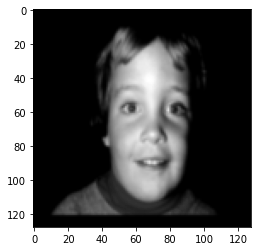

In [287]:
# 查看单个图片信息
f = open('./face/rawdata/1223','rb')  
x = np.fromfile(f,dtype=np.ubyte)
x = x.reshape(128,-1)
print(x.shape)
plt.imshow(x,cmap=plt.cm.gray)
plt.show()
f.close()

(128, 128)


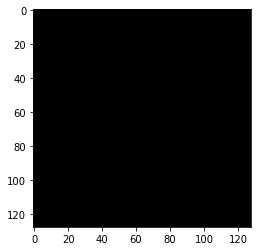

In [3]:
f = open('./face/有问题的数据/2099','rb')  
x = np.fromfile(f,dtype=np.ubyte)
x = x.reshape(128,-1)
print(x.shape)
plt.imshow(x,cmap=plt.cm.gray)
plt.show()
f.close()

In [9]:
# 源数据处理
all_file = os.listdir('./face/rawdata')
# 读取所有data_x数据,  有问题的数据：第1186个，2412号；第1190个，2416号 ；2021号
data_x = np.zeros((len(all_file),128,128))        #生成（len（all_file），128，128）的全零矩阵，（128,128）中为后续存储每个照片中的数据
data_y = np.zeros(len(all_file))

# 将两个数据标签整理在一起
f = open('./face/faceDR','r')
r1 = f.readlines()          #读取文件f中的所有行并返回列表
f.close()

f = open('./face/faceDS','r')
r2 = f.readlines()     
f.close()
for i in r2:        #将r2加到r1的后面
    r1.append(i)

# 整理出data_x,和data_y
all_file = os.listdir('./face/rawdata')      #以列表形式返回文件名
for i in range(len(all_file)):               #每张照片
    with open('./face/rawdata/'+all_file[i],'rb') as f:
        x = np.fromfile(f,dtype=np.ubyte)
        x = x.reshape(128,-1)
        data_x[i] = x
        for j in r1:
            if all_file[i] in j:
                if 'female' in j:
                    data_y[i] = 0
                elif 'male' in j:
                    data_y[i] = 1
                else:
                    data_y[i] = None
                break
face_data=data_x.reshape(data_x.shape[0],-1)           #shape[0]就是读取矩阵第一维度的长度
face_target = data_y
X = face_data
Y = face_target

## 2.查看整理后的数据和标签，确定为二分类问题

In [5]:
X.shape

(3983, 16384)

In [7]:
np.unique(Y)

array([0., 1.])

In [10]:
data = pd.DataFrame(X)
data.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
0,3983.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
1,3983.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
2,3983.0,0.010043,0.207590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,6.0
3,3983.0,0.307557,3.489103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.00,84.0
4,3983.0,0.795631,7.802234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.18,170.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16379,3983.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
16380,3983.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
16381,3983.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
16382,3983.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0


## 3.PCA降维，查看降维后的数据，并对数据进行标准化

In [12]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.3,random_state=420)
print("Ytrain:")
valuec = pd.Series(Ytrain).value_counts()
print(valuec)
print(valuec[0]/valuec.sum())
print("Ytest:")
valuec = pd.Series(Ytest).value_counts()
print(valuec)
print(valuec[0]/valuec.sum())

Ytrain:
1.0    1671
0.0    1117
dtype: int64
0.40064562410329985
Ytest:
1.0    746
0.0    449
dtype: int64
0.3757322175732218


In [15]:
#pca = PCA(n_components=76, svd_solver='randomized',whiten=True).fit(X)
pca = PCA(n_components=0.95).fit(X)
x_dr = pca.transform(X)
print(x_dr.shape)
X_1 = x_dr

(3983, 178)


In [11]:
pca = PCA(svd_solver='randomized',n_components=76, whiten=True).fit(Xtrain)
Xtrain_pca = pca.transform(Xtrain)  
Xtest_pca = pca.transform(Xtest)  

In [7]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

plot the gallery of the most significative eigenfaces
eigenfaces = pca.components_.reshape((178, 128, 128))
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, 128, 128)

plt.show()

SyntaxError: invalid syntax (Temp/ipykernel_2832/3544806315.py, line 12)

In [17]:
data = pd.DataFrame(X_1)
data.describe([0.01,0.1,0.3,0.6,0.9,0.99]).T

,count,mean,std,min,1%,10%,30%,50%,60%,90%,99%,max
0,3983.0,-1.280012e-13,2688.746361,-6714.727125,-5507.926714,-3332.978450,-1460.022822,6.394695,706.649925,3209.777668,6980.504710,16771.751202
1,3983.0,-2.544396e-13,1467.360731,-3626.052216,-2448.129003,-1462.504711,-709.368472,-192.432578,123.044468,1329.762081,4392.236972,17177.238662
2,3983.0,-4.153009e-15,1364.845763,-4933.961910,-2739.453395,-1575.364247,-780.783277,-101.066619,178.750275,1762.715601,3578.235153,9285.613532
3,3983.0,-1.167695e-13,988.764143,-4317.029395,-2287.745234,-1105.646696,-486.463888,-77.236533,126.124647,1237.340754,2876.651096,4730.791887
4,3983.0,-1.305272e-13,943.902610,-4989.959887,-2092.063416,-1041.154667,-423.044975,-41.808227,124.123728,1075.580907,3198.698437,5244.974527
...,...,...,...,...,...,...,...,...,...,...,...,...
173,3983.0,1.034684e-14,77.824523,-363.913666,-198.114962,-91.961485,-37.029120,-2.117024,16.831930,94.353383,201.485486,499.985130
174,3983.0,5.389278e-15,77.489079,-338.750453,-194.923714,-93.057455,-35.845503,-1.041492,16.021562,93.849466,200.267043,386.544268
175,3983.0,-9.735845e-15,76.933503,-289.168233,-196.379307,-94.135460,-34.044384,0.956367,15.752523,87.818021,198.401217,684.320739
176,3983.0,1.626238e-14,76.544570,-351.067714,-192.361949,-88.688734,-34.111166,-1.443319,15.325849,89.647900,200.416974,673.699818


In [18]:
X_2 = StandardScaler().fit_transform(X_1)
data = pd.DataFrame(X_2)
data.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
0,3983.0,-6.442388e-17,1.000126,-2.497659,-2.048768,-1.701707,-1.239759,-0.675909,0.002379,0.645476,1.193932,2.596519,6.238542
1,3983.0,3.761184e-16,1.000126,-2.471449,-1.668599,-1.223393,-0.996816,-0.577625,-0.131158,0.475502,0.906341,2.993666,11.707684
2,3983.0,1.486104e-16,1.000126,-3.615486,-2.007404,-1.433535,-1.154388,-0.696121,-0.074059,0.619293,1.291675,2.622043,6.804270
3,3983.0,-7.459093e-17,1.000126,-4.366634,-2.314033,-1.429826,-1.118351,-0.604710,-0.078124,0.526015,1.251558,2.909705,4.785151
4,3983.0,1.609726e-16,1.000126,-5.287184,-2.216676,-1.410238,-1.103170,-0.570927,-0.044299,0.442323,1.139647,3.389227,5.557388
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3983.0,6.427754e-17,1.000126,-4.676667,-2.545982,-1.567964,-1.181800,-0.606436,-0.027206,0.600521,1.212538,2.589297,6.425326
174,3983.0,-1.282206e-17,1.000126,-4.372138,-2.515815,-1.642933,-1.201061,-0.600082,-0.013442,0.584622,1.211284,2.584780,4.988997
175,3983.0,-2.595073e-17,1.000126,-3.759150,-2.552906,-1.619534,-1.223749,-0.573894,0.012433,0.594034,1.141623,2.579190,8.896081
176,3983.0,-6.979660e-17,1.000126,-4.587024,-2.513387,-1.586332,-1.158800,-0.573152,-0.018858,0.568122,1.171333,2.618633,8.802511


# 建立决策树模型

## 1.对未降维数据进行训练 

In [4]:
from sklearn import tree

In [39]:
Xtrain_1, Xtest_1, Ytrain_1, Ytest_1 = train_test_split(X,Y,test_size=0.3,random_state=420)
tr_man_1 = 0
tr_woman_1 = 0
#训练集是否均衡
for i in range(len(Ytrain_1)):
    if Ytrain_1[i] == 1.0:
        tr_man_1 = tr_man_1+1
    if Ytrain_1[i] == 0.0:
        tr_woman_1 = tr_woman_1+1
rate_1 = tr_man_1/tr_woman_1
print("man:%s"%tr_man_1)
print("woman:%s"%tr_woman_1)
print("rate:%f"%rate_1)

man:1671
woman:1117
rate:1.495971


In [161]:
clf=tree.DecisionTreeClassifier()
clf=clf.fit(Xtrain_1,Ytrain_1)
score=clf.score(Xtest_1,Ytest_1)
score

0.7096234309623431

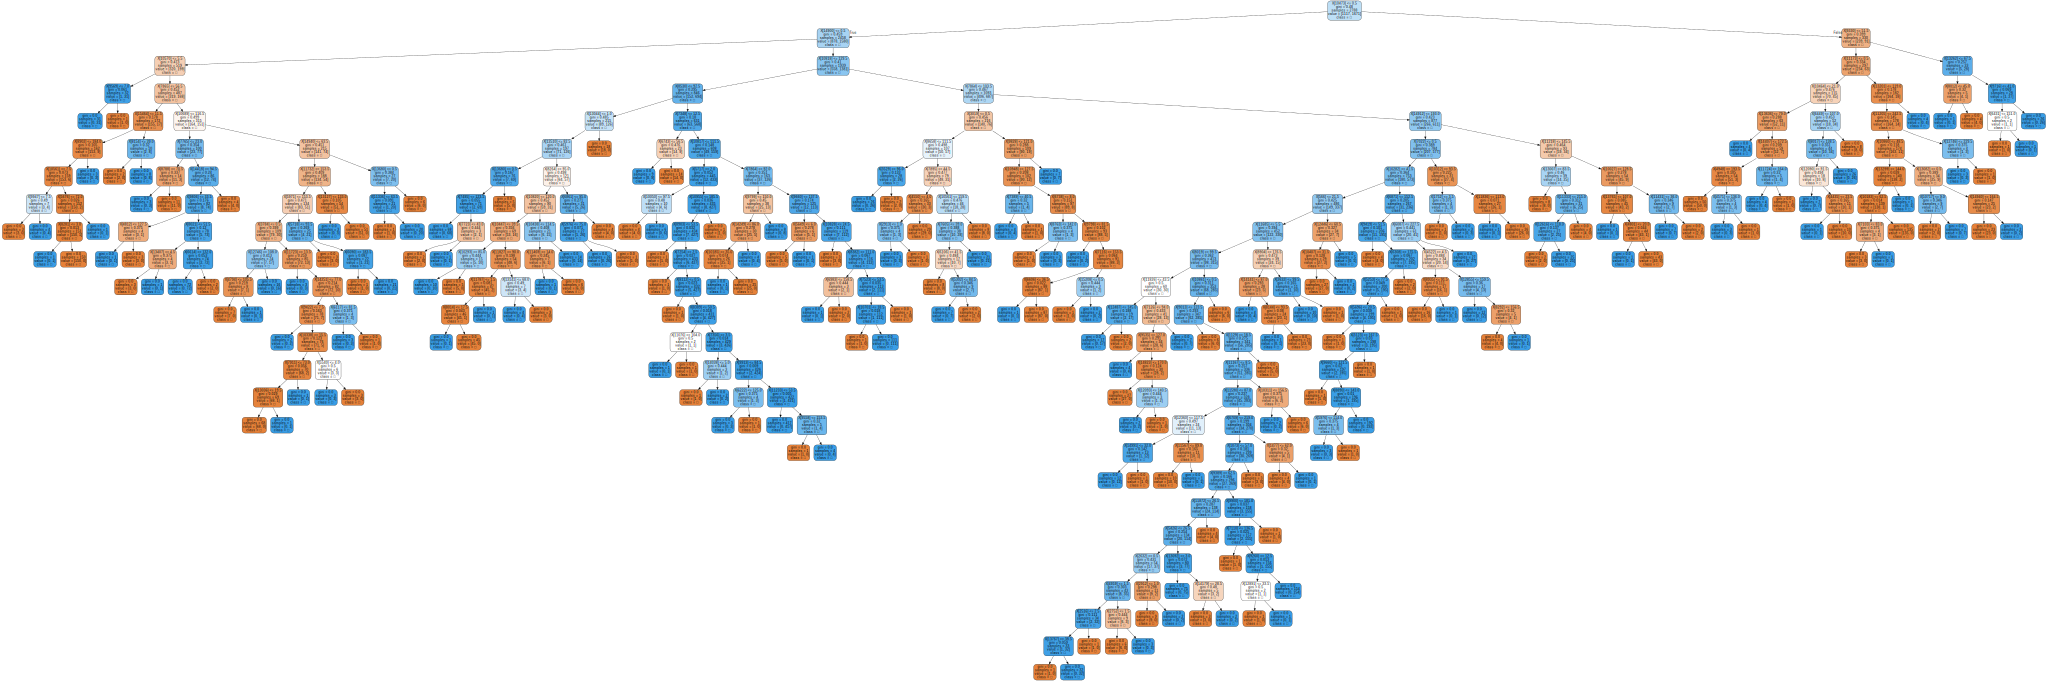

In [162]:
import graphviz
dot_data=tree.export_graphviz(clf
                              ,class_names=["男","女"]
                              ,filled=True
                              ,rounded=True
                             )
graph=graphviz.Source(dot_data)
graph

## 2.对降维后数据进行训练

In [19]:
Xtrain_2, Xtest_2, Ytrain_2, Ytest_2 = train_test_split(X_2,Y,test_size=0.3,random_state=420)
tr_man_2 = 0
tr_woman_2 = 0
#训练集是否均衡
for i in range(len(Ytrain_2)):
    if Ytrain_2[i] == 1.0:
        tr_man_2 = tr_man_2+1
    if Ytrain_2[i] == 0.0:
        tr_woman_2 = tr_woman_2+1
rate_2 = tr_man_2/tr_woman_2
print("man:%s"%tr_man_2)
print("woman:%s"%tr_woman_2)
print("rate:%f"%rate_2)

man:1671
woman:1117
rate:1.495971


In [236]:
clf=tree.DecisionTreeClassifier()
clf=clf.fit(Xtrain_2,Ytrain_2)
score=clf.score(Xtest_2,Ytest_2)
score

0.695397489539749

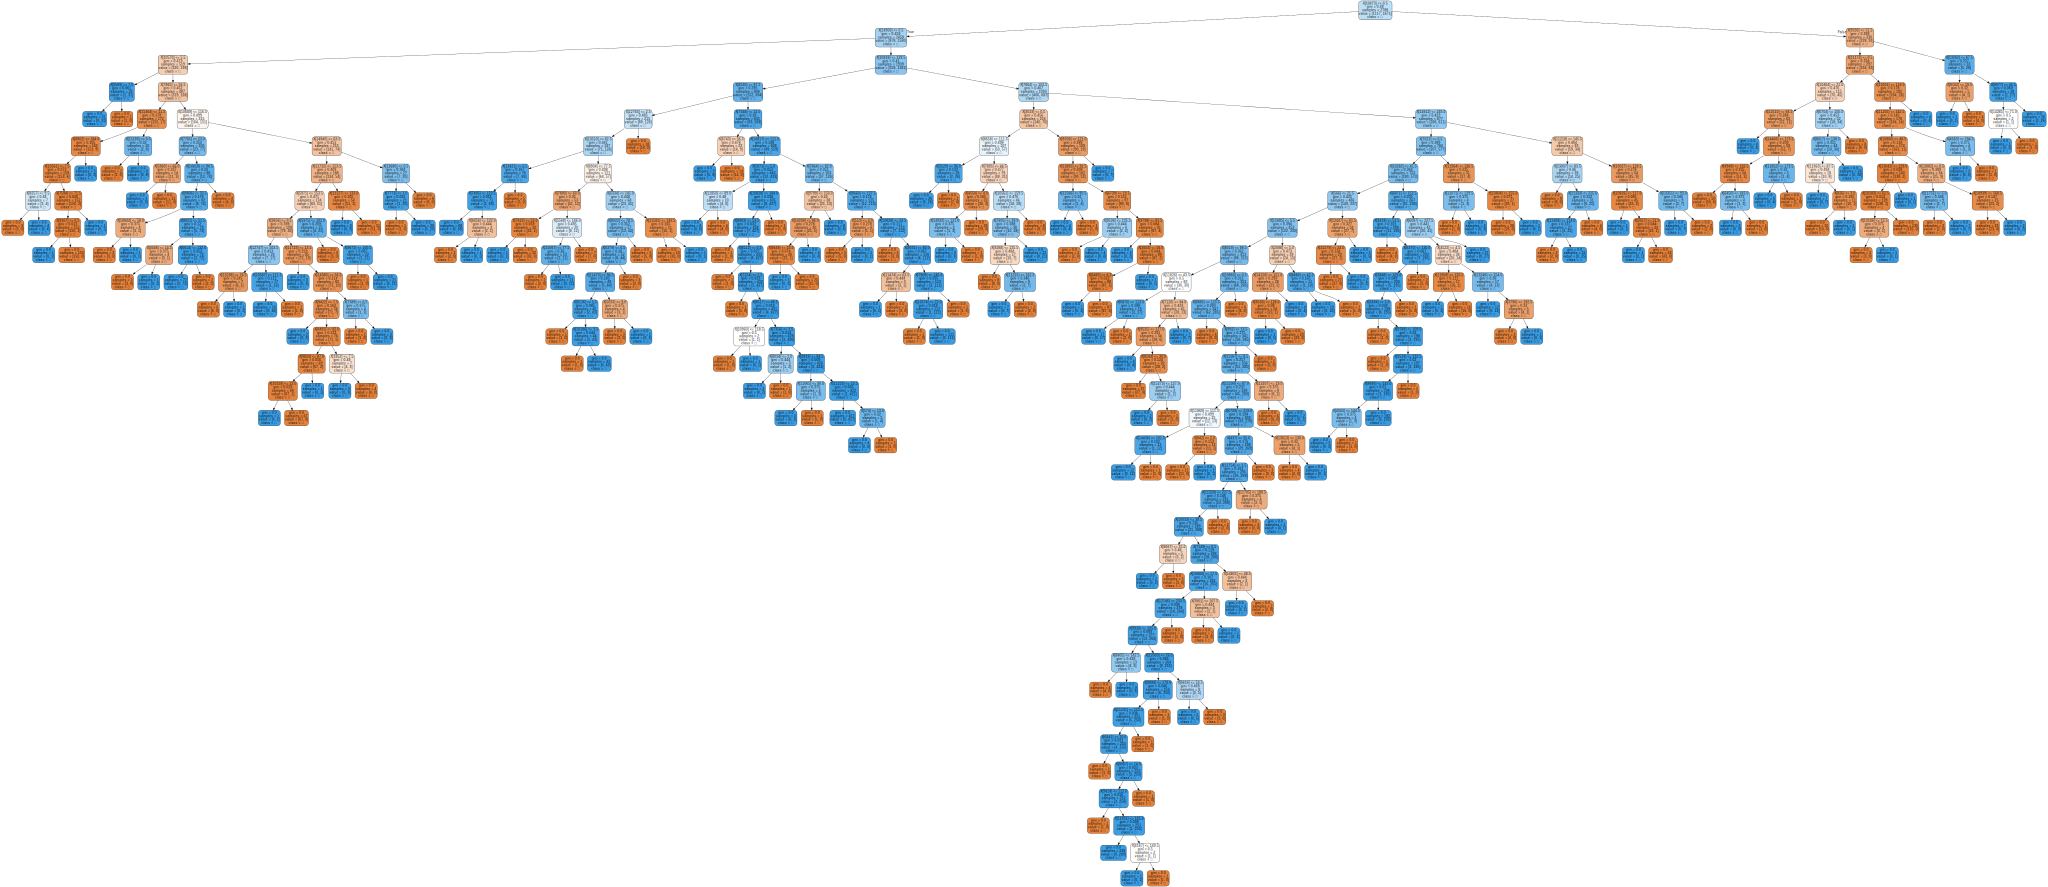

In [142]:
import graphviz
dot_data=tree.export_graphviz(clf
                              ,class_names=["男","女"]
                              ,filled=True
                              ,rounded=True
                             )
graph=graphviz.Source(dot_data)
graph

## 分类器性能评价和调参

In [164]:
#查看决策树对训练集的拟合程度
score_train={clf.score(Xtrain_2,Ytrain_2)}
score_train

{1.0}

In [266]:
#手动确定最佳random_state值
clf_1=tree.DecisionTreeClassifier(random_state=80)
clf_1=clf_1.fit(Xtrain_2,Ytrain_2)
score_1=clf_1.score(Xtest_2,Ytest_2)
print("random_state=80:",score_1)
clf_2=tree.DecisionTreeClassifier(random_state=90)
clf_2=clf_2.fit(Xtrain_2,Ytrain_2)
score_2=clf_2.score(Xtest_2,Ytest_2)
print("random_state=90:",score_2)
clf_3=tree.DecisionTreeClassifier(random_state=100)
clf_3=clf_3.fit(Xtrain_2,Ytrain_2)
score_3=clf_3.score(Xtest_2,Ytest_2)
print("random_state=100:",score_3)

random_state=80: 0.6853556485355649
random_state=90: 0.6928870292887029
random_state=100: 0.6903765690376569


In [248]:
#调整 criterion
param_grid={'criterion':['gini','entropy']}
rfc=DecisionTreeClassifier(random_state=90)
GS=GridSearchCV(rfc,param_grid,cv=10)    #网格搜索
GS.fit(X_2,Y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=90),
             param_grid={'criterion': ['gini', 'entropy']})

In [249]:
GS.best_params_        #显示调整出来的最佳参数

{'criterion': 'entropy'}

In [250]:
GS.best_score_         #返回调整好的最佳参数对应的准确率

0.6060899736779134

In [196]:
#调整 splitter
param_grid={'splitter':['best','random']}
rfc=DecisionTreeClassifier(criterion="entropy",
                           random_state=90)
GS=GridSearchCV(rfc,param_grid,cv=10)    #网格搜索
GS.fit(X_2,Y)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=90),
             param_grid={'splitter': ['best', 'random']})

In [197]:
GS.best_params_        #显示调整出来的最佳参数

{'splitter': 'best'}

In [198]:
GS.best_score_         #返回调整好的最佳参数对应的准确率

0.6060899736779134

In [200]:
#调整max_depth
param_grid={'max_depth':np.arange(1,30,1)}
rfc=DecisionTreeClassifier(criterion="entropy",
                           random_state=90,
                           splitter="best")
GS=GridSearchCV(rfc,param_grid,cv=10)    #网格搜索
GS.fit(X_2,Y)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=90),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [201]:
GS.best_params_        #显示调整出来的最佳参数

{'max_depth': 5}

In [202]:
GS.best_score_         #返回调整好的最佳参数对应的准确率

0.638237553683203

In [211]:
#调整 min_samples_split
param_grid={'min_samples_split':np.arange(2,2+20,1)}
rfc=DecisionTreeClassifier(criterion="entropy",
                           random_state=90,
                           splitter="best",
                           max_depth=5)
GS=GridSearchCV(rfc,param_grid,cv=10)    #网格搜索
GS.fit(X_2,Y)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                              random_state=90),
             param_grid={'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21])})

In [212]:
GS.best_params_        #显示调整出来的最佳参数

{'min_samples_split': 15}

In [213]:
GS.best_score_         #返回调整好的最佳参数对应的准确率

0.6389913225274241

In [217]:
#调整 min_samples_leaf
param_grid={'min_samples_leaf':np.arange(1,1+20,1)}
rfc=DecisionTreeClassifier(criterion="entropy",
                           random_state=90,
                           splitter="best",
                           max_depth=5,
                           min_samples_split=15)
GS=GridSearchCV(rfc,param_grid,cv=10)    #网格搜索
GS.fit(X_2,Y)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                              min_samples_split=15,
                                              random_state=90),
             param_grid={'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])})

In [218]:
GS.best_params_        #显示调整出来的最佳参数

{'min_samples_leaf': 19}

In [219]:
GS.best_score_         #返回调整好的最佳参数对应的准确率

0.6407526353572373

In [226]:
#调整 max_features
param_grid={'max_features':np.arange(5,30,1)}
rfc=DecisionTreeClassifier(criterion="entropy",
                           random_state=90,
                           splitter="best",
                           max_depth=5,
                           min_samples_split=15,
                           min_samples_leaf=19)
GS=GridSearchCV(rfc,param_grid,cv=10)    #网格搜索
GS.fit(X_2,Y)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                              min_samples_leaf=19,
                                              min_samples_split=15,
                                              random_state=90),
             param_grid={'max_features': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29])})

In [227]:
GS.best_params_        #显示调整出来的最佳参数

{'max_features': 21}

In [228]:
GS.best_score_         #返回调整好的最佳参数对应的准确率

0.637977481391922

## 10折交叉验证

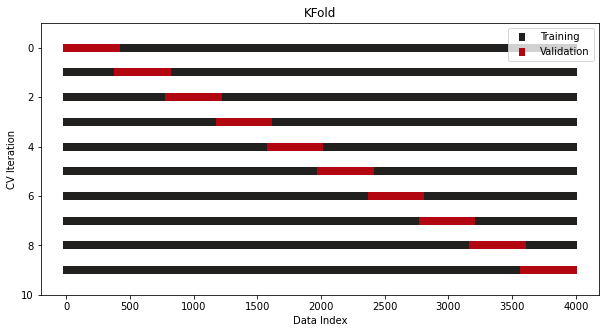

[0.5112782  0.66666667 0.62656642 0.73869347 0.65829146 0.6758794
 0.72361809 0.57788945 0.59296482 0.63567839]
The average score is 0.640753


In [283]:
import matplotlib.pyplot as plt
import numpy as np
def visualize_cv(cv, X, y): 
    fig, ax = plt.subplots(figsize=(10, 5)) 
 
    for ii, (tr, tt) in enumerate(cv.split(X, y)): 
        p1 = ax.scatter(tr, [ii] * len(tr), c="#221f1f", marker="_", lw=8) 
        p2 = ax.scatter(tt, [ii] * len(tt), c="#b20710", marker="_", lw=8) 
        ax.set( 
            title=cv.__class__.__name__, 
            xlabel="Data Index", 
            ylabel="CV Iteration", 
            ylim=[cv.n_splits, -1], 
        ) 
        ax.legend([p1, p2], ["Training", "Validation"]) 
 
    plt.show()

from sklearn.model_selection import KFold  
cv = KFold(n_splits=10) 
visualize_cv(cv, X_2, Y)
clf=DecisionTreeClassifier(criterion="entropy",
                           random_state=90,
                           splitter="best",
                           max_depth=5,
                           min_samples_split=15,
                           min_samples_leaf=19)
scores_1=cross_val_score(clf,X_2,Y,cv=10)

print(scores_1)
average_1 = 0
for i in range(len(scores_1)):
    average_1 = average_1 + scores_1[i]
average_1=average_1/len(scores_1)
print("The average score is %f"%(average_1))

In [24]:
clf=tree.DecisionTreeClassifier(criterion="entropy",
                                random_state=90,
                                splitter="best",
                                max_depth=5,
                                min_samples_split=15,
                                min_samples_leaf=19)
clf=clf.fit(Xtrain_2,Ytrain_2)
score_c=clf.score(Xtest_2,Ytest_2)
score_c

0.6719665271966527

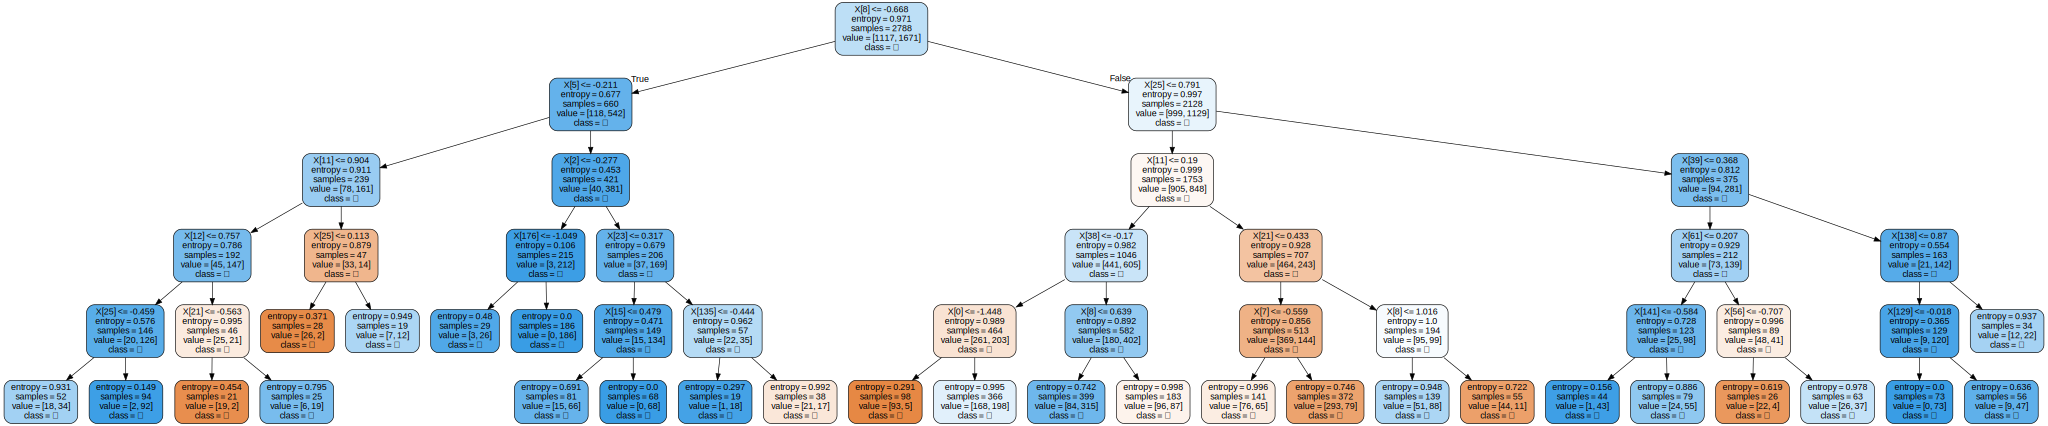

In [22]:
import graphviz
dot_data=tree.export_graphviz(clf
                              ,class_names=["男","女"]
                              ,filled=True
                              ,rounded=True
                             )
graph=graphviz.Source(dot_data)
graph

## 随机森林分类

In [26]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [27]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X_2,Y,test_size=0.3)

In [123]:
rfc=RandomForestClassifier(random_state=0)
rfc=rfc.fit(Xtrain,Ytrain)
score_r=rfc.score(Xtest,Ytest)
print("Random Forest:{}".format(score_r))     #{}中填入score_r的值

Random Forest:0.7907949790794979


## 分类器性能评价和调参

In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [83]:
rfc=RandomForestClassifier(n_estimators=98,random_state=90)  #实例化
score_pre=cross_val_score(rfc,X_2,Y,cv=10).mean()
score_pre

0.6741098978602285

0.685159506807219 152


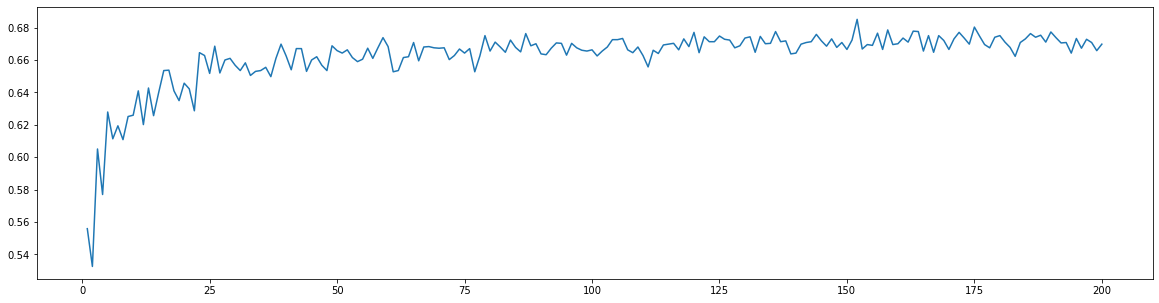

In [84]:
#确定随机森林的参数最佳值 n_estimators的学习曲线   
superpa=[]
for i in range(200):
    rfc=RandomForestClassifier(n_estimators=i+1,n_jobs=-1)
    rfc_s=cross_val_score(rfc,X_2,Y,cv=10).mean()
    superpa.append(rfc_s)
print(max(superpa),superpa.index(max(superpa))+1)     #superpa.index(max(superpa))+1为最佳n_estimators的取值
plt.figure(figsize=[20,5])
plt.plot(range(1,201),superpa)
plt.show()

0.6751149229858566 150


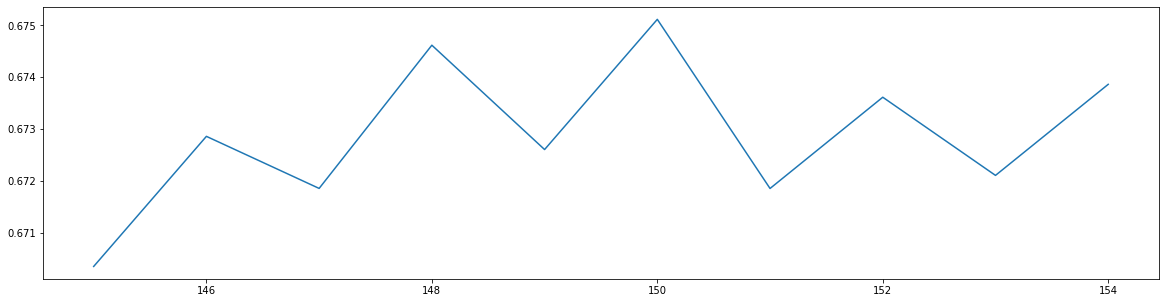

In [88]:
scorel=[]
for i in range(145,155):
    rfc=RandomForestClassifier(n_estimators=i,
                               n_jobs=-1,
                               random_state=90)
    score=cross_val_score(rfc,X_2,Y,cv=10).mean()
    scorel.append(score)
    
print(max(scorel),([*range(145,155)][scorel.index(max(scorel))]))     #superpa.index(max(superpa))+1为最佳n_estimators的取值
plt.figure(figsize=[20,5])
plt.plot(range(145,155),scorel)
plt.show()

In [90]:
#调整max_depth
param_grid={'max_depth':np.arange(1,40,1)}
rfc=RandomForestClassifier(n_estimators=150,
                           random_state=90)
GS=GridSearchCV(rfc,param_grid,cv=10)    #网格搜索
GS.fit(X_2,Y)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=150,
                                              random_state=90),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [91]:
GS.best_params_        #显示调整出来的最佳参数

{'max_depth': 17}

In [92]:
GS.best_score_         #返回调整好的最佳参数对应的准确率

0.6753775141371016

In [107]:
#调整 min_samples_split
param_grid={'min_samples_split':np.arange(2,2+20,1)}
rfc=RandomForestClassifier(n_estimators=150,
                           random_state=90,
                           max_depth=17)
GS=GridSearchCV(rfc,param_grid,cv=10)    #网格搜索
GS.fit(X_2,Y)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_depth=17, n_estimators=150,
                                              random_state=90),
             param_grid={'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21])})

In [108]:
GS.best_params_        #显示调整出来的最佳参数

{'min_samples_split': 4}

In [109]:
GS.best_score_         #返回调整好的最佳参数对应的准确率

0.6756237326985807

In [111]:
#调整 min_samples_leaf
param_grid={'min_samples_leaf':np.arange(1,1+10,1)}
rfc=RandomForestClassifier(n_estimators=150,
                           random_state=90,
                           max_depth=17,
                           min_samples_split=4)
GS=GridSearchCV(rfc,param_grid,cv=10)    #网格搜索
GS.fit(X_2,Y)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_depth=17, min_samples_split=4,
                                              n_estimators=150,
                                              random_state=90),
             param_grid={'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])})

In [112]:
GS.best_params_        #显示调整出来的最佳参数

{'min_samples_leaf': 1}

In [113]:
GS.best_score_         #返回调整好的最佳参数对应的准确率

0.6756237326985807

In [119]:
#调整 max_features
param_grid={'max_features':np.arange(30,50,1)}
rfc=RandomForestClassifier(n_estimators=150,
                           random_state=90,
                           max_depth=17,
                           min_samples_split=4,
                           min_samples_leaf=1)
GS=GridSearchCV(rfc,param_grid,cv=10)    #网格搜索
GS.fit(X_2,Y)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_depth=17, min_samples_split=4,
                                              n_estimators=150,
                                              random_state=90),
             param_grid={'max_features': array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
       47, 48, 49])})

In [120]:
GS.best_params_        #显示调整出来的最佳参数

{'max_features': 41}

In [121]:
GS.best_score_         #返回调整好的最佳参数对应的准确率

0.6967034420221407

In [127]:
#调整 Criterion
param_grid={'criterion':['gini','entropy']}
rfc=RandomForestClassifier(n_estimators=150,
                           random_state=90,
                           max_depth=17,
                           min_samples_split=4,
                           min_samples_leaf=1,
                           max_features=41)
GS=GridSearchCV(rfc,param_grid,cv=10)    #网格搜索
GS.fit(X_2,Y)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_depth=17, max_features=41,
                                              min_samples_split=4,
                                              n_estimators=150,
                                              random_state=90),
             param_grid={'criterion': ['gini', 'entropy']})

In [128]:
GS.best_params_        #显示调整出来的最佳参数

{'criterion': 'gini'}

In [129]:
GS.best_score_         #返回调整好的最佳参数对应的准确率

0.6967034420221407

## 调参后的模型及分类结果

In [124]:
rfc=RandomForestClassifier(n_estimators=150,
                           random_state=90,
                           max_depth=17,
                           min_samples_split=4,
                           min_samples_leaf=1,
                           max_features=41)
rfc=rfc.fit(Xtrain,Ytrain)
score=rfc.score(Xtest,Ytest)
print("Random Forest:{}".format(score))     #{}中填入score_c和score_r的值

Random Forest:0.7941422594142259


## 10折交叉验证

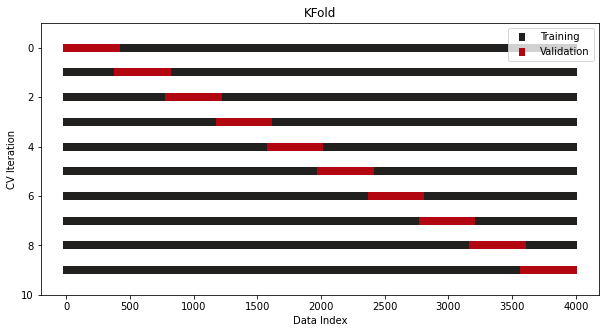

[0.62155388 0.77944862 0.71929825 0.77135678 0.74120603 0.6959799
 0.64572864 0.62060302 0.65829146 0.71356784]
The average score is 0.696703


In [282]:
import matplotlib.pyplot as plt
import numpy as np
def visualize_cv(cv, X, y): 
    fig, ax = plt.subplots(figsize=(10, 5)) 
 
    for ii, (tr, tt) in enumerate(cv.split(X, y)): 
        p1 = ax.scatter(tr, [ii] * len(tr), c="#221f1f", marker="_", lw=8) 
        p2 = ax.scatter(tt, [ii] * len(tt), c="#b20710", marker="_", lw=8) 
        ax.set( 
            title=cv.__class__.__name__, 
            xlabel="Data Index", 
            ylabel="CV Iteration", 
            ylim=[cv.n_splits, -1], 
        ) 
        ax.legend([p1, p2], ["Training", "Validation"]) 
 
    plt.show()

from sklearn.model_selection import KFold  
cv = KFold(n_splits=10) 
visualize_cv(cv, X_2, Y)
rfc=RandomForestClassifier(n_estimators=150,
                           random_state=90,
                           max_depth=17,
                           min_samples_split=4,
                           min_samples_leaf=1,
                           max_features=41)
scores_2=cross_val_score(rfc,X_2,Y,cv=10)

print(scores_2)
average_2 = 0
for i in range(len(scores_2)):
    average_2 = average_2 + scores_2[i]
average_2=average_2/len(scores_2)
print("The average score is %f"%(average_2))

In [284]:
average_2-average_1

0.055950806664903485

## 决策树和随机森林的交叉验证对比

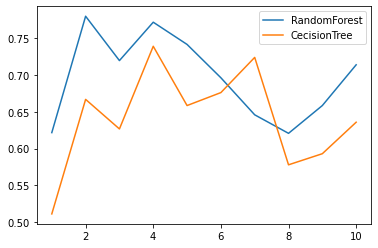

In [28]:
 #交叉验证;cross_val_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

rfc=RandomForestClassifier(n_estimators=150,
                           random_state=90,
                           max_depth=17,
                           min_samples_split=4,
                           min_samples_leaf=1,
                           max_features=41)
rfc_s=cross_val_score(rfc,X_2,Y,cv=10)

clf=DecisionTreeClassifier(criterion="entropy",
                           random_state=90,
                           splitter="best",
                           max_depth=5,
                           min_samples_split=15,
                           min_samples_leaf=19)
clf_s=cross_val_score(clf,X_2,Y,cv=10)

plt.plot(range(1,11),rfc_s,label="RandomForest")  #折线图
plt.plot(range(1,11),clf_s,label="CecisionTree")
plt.legend()    #显示图例（即，“RandomForest”）
plt.show()      #画出图像